# Machine Learning Models for Predicting “Personnel_needed” size for given Dish.

In this notebook we will build different regression models that recommends the “Personnel_needed” size for given Dish. This notebook is organized as follows: (1) Data preprocessing and variable selection; (2) Linear regression models ; (3) Support vector machines; (4) Random forest regressor; (5) Gradient Boosting

## 1. Data preprocessing and variable selection

### 1.1. Read dataset and display columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


We read the data set "menu_info.csv" into Dataframe.

In [2]:
df = pd.read_csv("menu_info.csv")

In [3]:
df.head()

,Dish_name,Restaurant,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dish_name             158 non-null    object 
 1   Restaurant            158 non-null    object 
 2   Preparation_duration  158 non-null    int64  
 3   Price                 158 non-null    float64
 4   Consumption_duration  158 non-null    float64
 5   Serving_duration      158 non-null    float64
 6   Waiting_duration      158 non-null    float64
 7   Spice_density         158 non-null    float64
 8   Personnel_needed      158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [5]:
df.columns

Index(['Dish_name', 'Restaurant', 'Preparation_duration', 'Price',
       'Consumption_duration', 'Serving_duration', 'Waiting_duration',
       'Spice_density', 'Personnel_needed'],
      dtype='object')

We can see that the dataframe has 158 rows and 9 columns, named as follow: 'Dish_name', 'Restaurant', 'Preparation_duration', 'Price','Consumption_duration', 'Serving_duration', 'Waiting_duration','Spice_density', 'Personnel_needed' and we can confirm that there aren't missing values in the data set.

### 1.2. Calculate basic statistics of the data

In [6]:
df.describe()

,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


### 1.3. Variable selection for predicting "Personnel_needed" variable

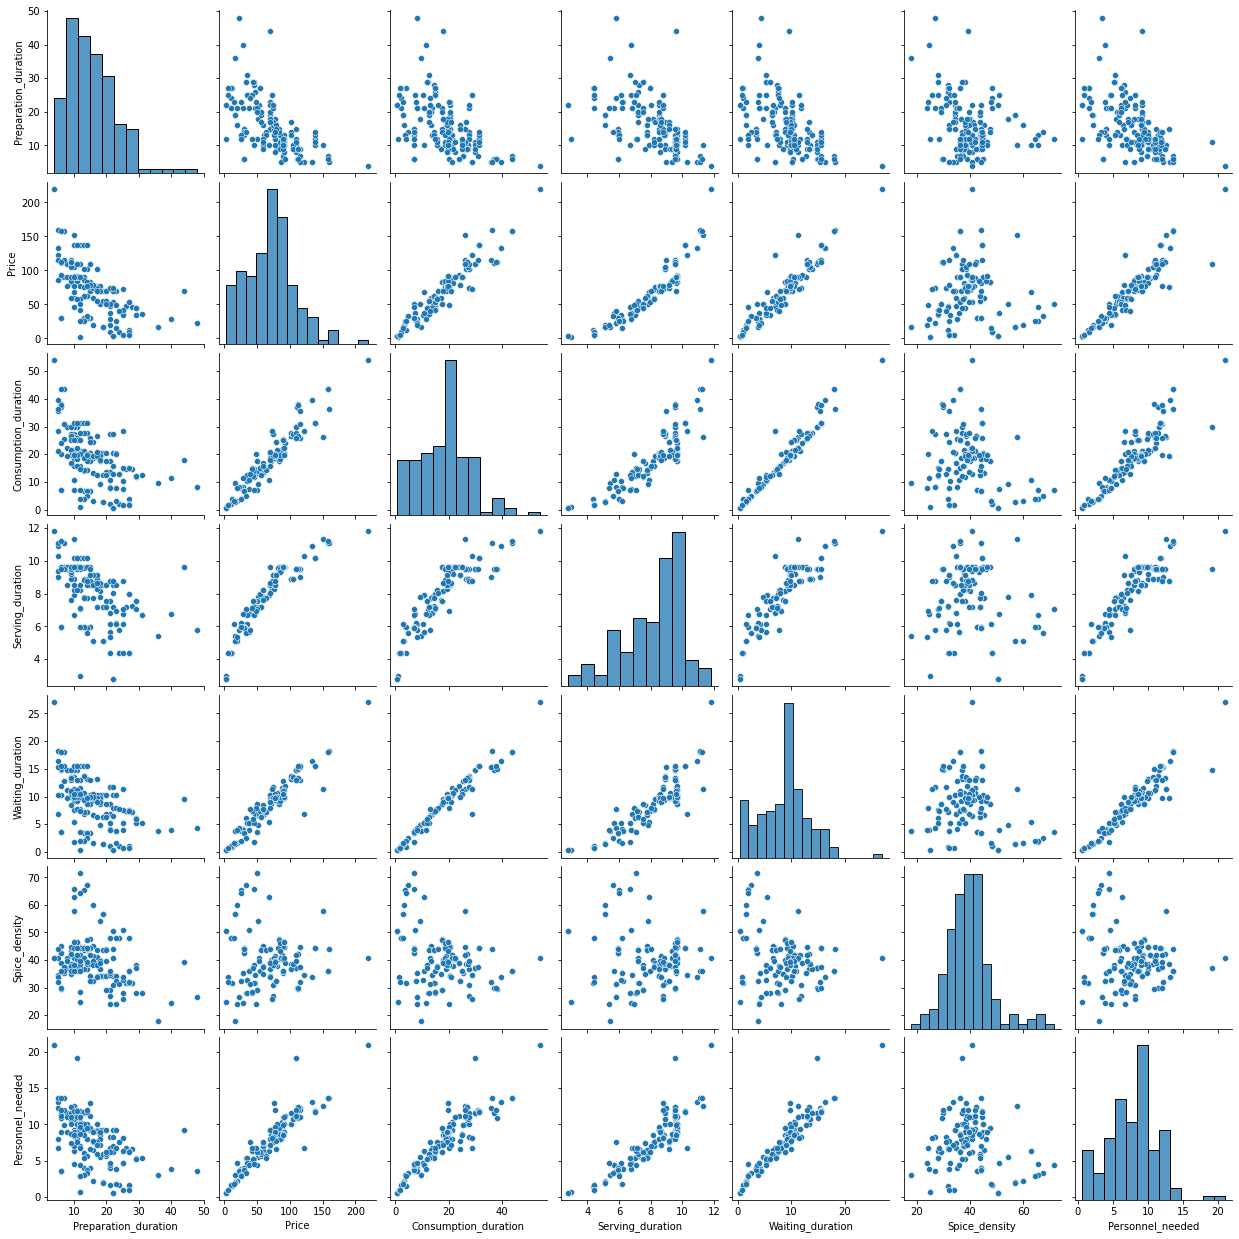

In [7]:
sns.pairplot(df)

In [8]:
df.corr()['Personnel_needed']

Preparation_duration   -0.530657
Price                   0.927569
Consumption_duration    0.915234
Serving_duration        0.895857
Waiting_duration        0.950823
Spice_density          -0.155509
Personnel_needed        1.000000
Name: Personnel_needed, dtype: float64

<AxesSubplot:>

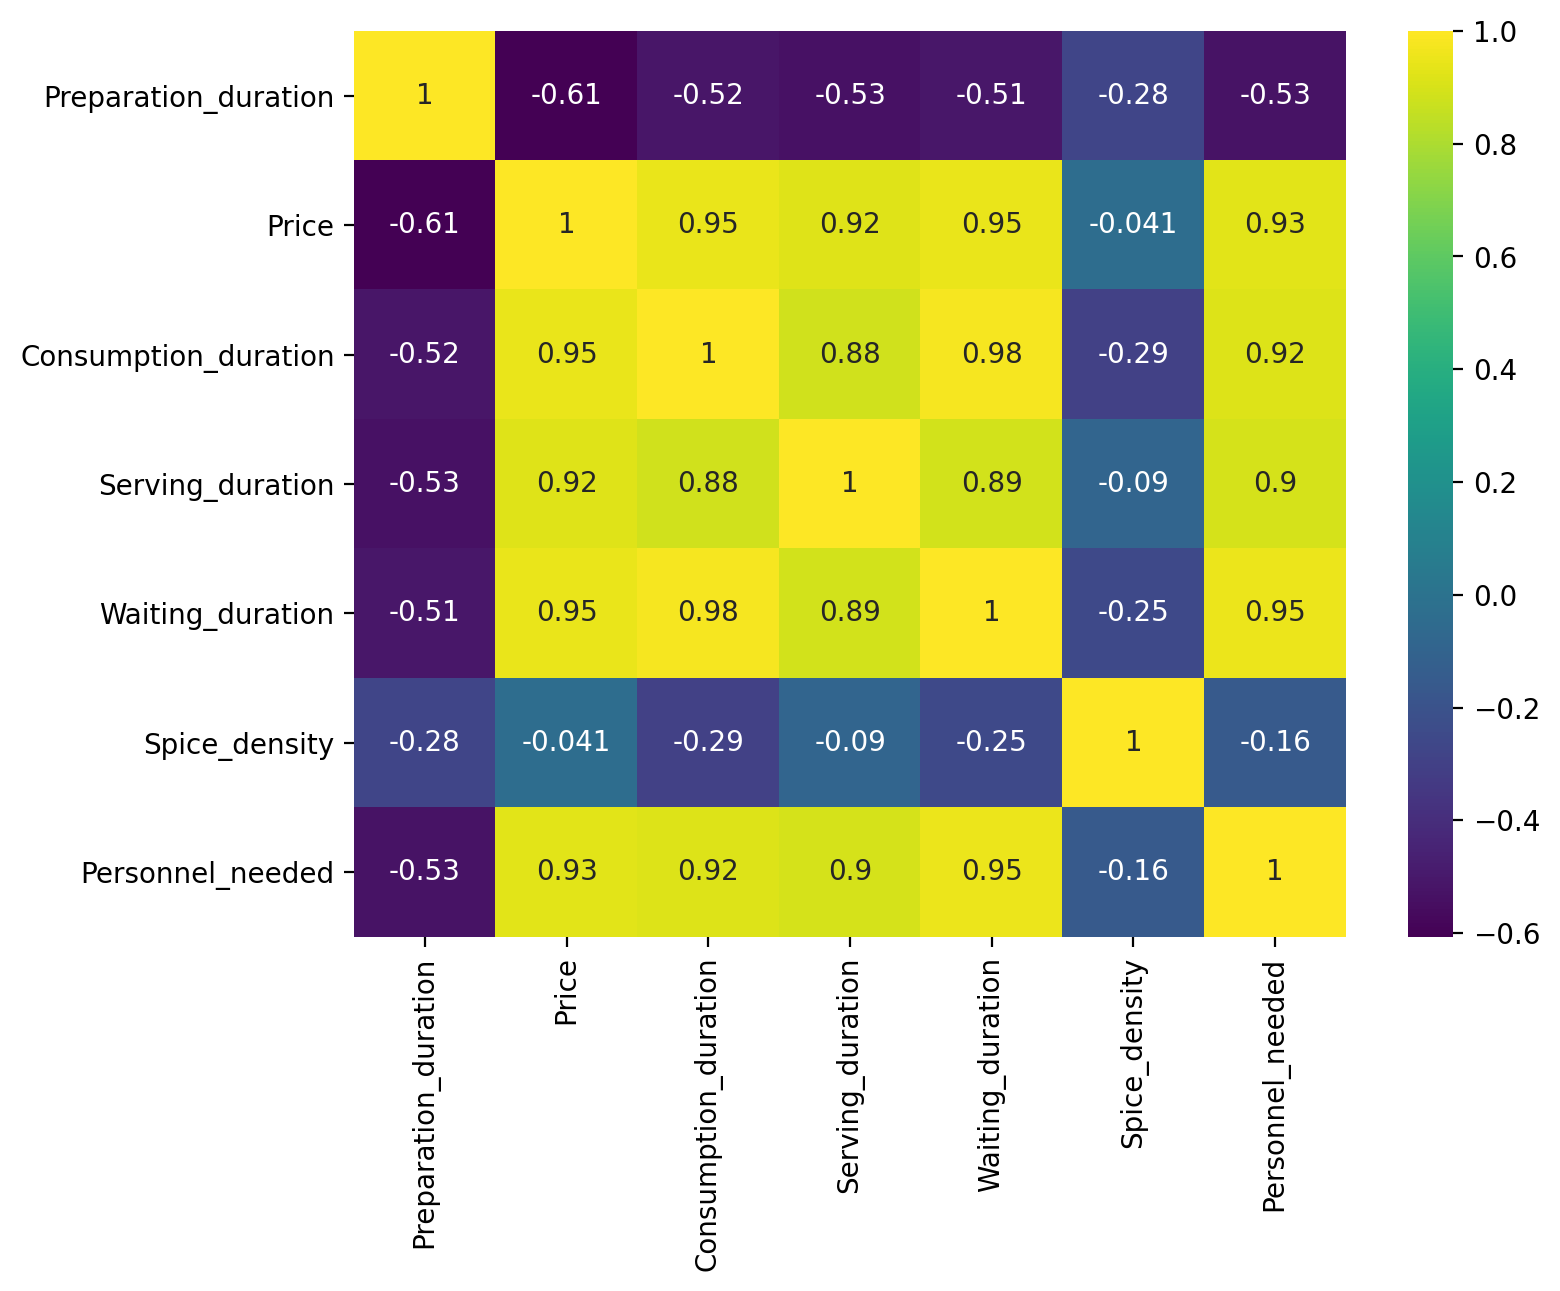

In [9]:
plt.figure (figsize = (8,6), dpi=200)
sns.heatmap(df.corr(),cmap='viridis', annot=True)

From the above pairplot and heatmap we can see that 'personnel needed' variable  has strong positive correalation with these variables: 'Price', 'Consumption_duration', "Serving_duration' and 'Waiting_duration', and has not that strong negative corelation with 'Preparation_duration' and low negative correlation between 'Personnel needed' variable and 'Spice_density'.
So we decided to keep all the variables for our ML model.


### 1.4. One-hot encoding for categorical features

In [10]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [11]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [12]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [13]:
final_df.head()

,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed,Dish_name_Allegra,Dish_name_Amsterdam,Dish_name_Arcadia,...,Restaurant_Oceania,Restaurant_Orient,Restaurant_P&O,Restaurant_Princess,Restaurant_Regent_Seven_Seas,Restaurant_Royal_Caribbean,Restaurant_Seabourn,Restaurant_Silversea,Restaurant_Star,Restaurant_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.5. Create training and testing sets 

In [14]:
X = final_df.drop('Personnel_needed',axis=1)
y = final_df['Personnel_needed']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

The dataset features has a variety of scales and units. For optimal regression performance, we should scale the X features.

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 2. Linear regression models

### 2.1. Linear Regression

First we will build Linear Regression Model and we will evaluate its perforamnce.

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_reg_model = LinearRegression()

In [22]:
linear_reg_model.fit(scaled_X_train,y_train)

LinearRegression()

In [23]:

print('R-squared score (training): {:.3f}'
     .format(linear_reg_model.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linear_reg_model.score(scaled_X_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.747


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(linear_reg_model,scaled_X_train,y_train,
                         scoring='r2',cv=10)

In [26]:
scores.mean()

0.6851317081612053

When comparing training ste and test set scores, we find that we predict very accurately on the training set, but the R2 score on the test set is much worse. With cross validation we can see that avarage R2 score is 0,68, which mean that the linear model does not generalized well. The discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we schould try to find a model that allows to control complexity. Next we will try with Ridge Regression (L2 Regularization) and Lasso (L1 Regularization).

### 2.2. Ridge Regression

In [27]:
from sklearn.linear_model import RidgeCV

In [28]:
ridge_cv_model = RidgeCV(alphas=(0.1,0.5, 1.0, 2.0, 3.0, 5.0, 10.0,15.0, 20.0),scoring = 'r2', cv=10)

In [29]:
ridge_cv_model.fit(scaled_X_train,y_train)

RidgeCV(alphas=array([ 0.1,  0.5,  1. ,  2. ,  3. ,  5. , 10. , 15. , 20. ]),
        cv=10, scoring='r2')

In [30]:
ridge_cv_model.alpha_

0.5

In [31]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5).fit(scaled_X_train, y_train)


print('R-squared score (training): {:.3f}'
     .format(ridge_model.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(ridge_model.score(scaled_X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(ridge_model.coef_ != 0)))

R-squared score (training): 0.984
R-squared score (test): 0.928
Number of non-zero features: 111


In [32]:
scores = cross_val_score(ridge_model,scaled_X_train,y_train,
                         scoring='r2',cv=10)

In [33]:
scores.mean()

0.849275229942765

As we can see the training set score of Ridge is lower then for LinearRegression, while the test set score is higher.
The avarage score with cross validation is 0.84 which is far better that Linear regression.

### 2.3. Lasso regression

In [34]:
from sklearn.linear_model import LassoCV

In [35]:
lasso_cv_model = LassoCV(eps=0.0001,n_alphas=1000,cv=10)

In [36]:
lasso_cv_model.fit(scaled_X_train,y_train)

LassoCV(cv=10, eps=0.0001, n_alphas=1000)

In [37]:
lasso_cv_model.alpha_

0.020929272040459565

From LassoCV we get that the best alpha for Lasso model is 0.02

In [38]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.02, max_iter = 10000).fit(scaled_X_train, y_train)

print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(scaled_X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Non-zero features: 9
R-squared score (training): 0.969
R-squared score (test): 0.927

Features with non-zero weight (sorted by absolute magnitude):
	Waiting_duration, 16.422
	Dish_name_Conquest, 5.085
	Serving_duration, 2.862
	Dish_name_Spirit, 1.594
	Restaurant_Royal_Caribbean, -0.950
	Price, 0.323
	Restaurant_Holland_American, -0.218
	Restaurant_Celebrity, 0.086
	Restaurant_Norwegian, 0.008


In [39]:
scores = cross_val_score(linlasso,scaled_X_train,y_train,
                         scoring='r2',cv=10)

In [40]:
scores.mean()

0.9164979846254655

With Lasso we get even better results on training and test score, and higher average score with cross validation.

### 2.4. Elastic Net


Elastic Net combines the penalties of Ridge regression and Lasso in an attempt to get the best of both.

In [41]:
from sklearn.linear_model import ElasticNetCV

In [42]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1], cv=10)

In [43]:
elastic_model.fit(scaled_X_train,y_train)

ElasticNetCV(cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [44]:
elastic_model.l1_ratio_

1.0

From performing ElastcNetCV we get that best l1_ratio is equal to 1, which mean ElastcNet will perform same as Lasso.

## 3. Support Vector Machines - Regression

In [45]:
from sklearn.svm import SVR

In [46]:
param_grid = {'C':[0.01,0.1,0.5,1,5,10,20,50],
             'kernel':['linear','rbf','poly', 'sigmoid'],
              'gamma':['scale','auto'],
              'degree':[2,3,4]}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid, cv = 10)

In [49]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50],
                         'degree': [2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [50]:
grid.best_params_

{'C': 5, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [51]:
svr_model =SVR(C = 5, degree =2, gamma ='scale', kernel= 'linear')
svr_model.fit(scaled_X_train, y_train)

print('R-squared score (training): {:.3f}'
     .format(svr_model.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(svr_model.score(scaled_X_test, y_test)))

R-squared score (training): 0.986
R-squared score (test): 0.944



In [52]:
scores = cross_val_score(svr_model,scaled_X_train,y_train,
                         scoring='r2',cv=10)

In [53]:
scores.mean()

0.85582045381261

## 4. Random Forest Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
n_estimators=[64,100,128,200]
max_features= ["auto", "sqrt", "log2", 54]  #for regression model n/3
bootstrap = [True,False]


In [56]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [57]:
rfr = RandomForestRegressor(random_state = 101)
grid = GridSearchCV(rfr,param_grid, cv=10)

In [58]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=101),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2', 54],
                         'n_estimators': [64, 100, 128, 200]})

In [59]:
grid.best_params_

{'bootstrap': True, 'max_features': 54, 'n_estimators': 200}

In [60]:
rfr_model = RandomForestRegressor(bootstrap = True, max_features = 54, n_estimators = 200, random_state = 101)

In [61]:
rfr_model.fit(X_train, y_train)

print('R-squared score (training): {:.3f}'
     .format(rfr_model.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(rfr_model.score(X_test, y_test)))

R-squared score (training): 0.980
R-squared score (test): 0.950



In [62]:
scores = cross_val_score(rfr_model,X_train,y_train,scoring='r2',cv=10)

In [63]:
scores.mean()

0.8663194970861907

## 5. Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
param_grid = {'learning_rate':[0.01,0.1,0.2,0.5], 'n_estimators':[50,100,150],'max_depth':[3,4,5,6]}

In [66]:
gb_model = GradientBoostingRegressor(random_state = 101)

In [67]:
grid = GridSearchCV(gb_model,param_grid, cv=10)

In [68]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150]})

In [69]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}

In [70]:
gradient_boost_model = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 3, n_estimators = 150, random_state = 101)

In [71]:
gradient_boost_model.fit(X_train, y_train)

print('R-squared score (training): {:.3f}'
     .format(gradient_boost_model.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(gradient_boost_model.score(X_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 0.930



In [72]:
scores = cross_val_score(gradient_boost_model,X_train,y_train,scoring='r2',cv=10)

In [73]:
scores.mean()

0.8657599563330287

Finally we can make conclusion that as we build more advanced models we get better results.